In [43]:
import numpy as np

In [44]:
freq = 12 #liczba okresów w roku (miesięcznie)
rate = 0.0675 #roczna stopa procentowa
years = 30 #liczba lat
pv =200000 #wartość obecna (pożyczka) present value

rate /= freq #konwersja stopy do okresu miesięcznego (/= to skrót dla rate = rate 
nper = years * freq #liczba okresów

periods = np.arange(1, nper + 1,dtype=int) #tworzenie tablicy okresów od 1 do nper
periods

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [45]:
%pip install numpy_financial
import numpy_financial as npf
interest_equal = np.around(-npf.ipmt(rate, periods, nper, pv),2) #obliczanie odsetek dla każdego okresu
interest_equal[:10] #wyświetlanie pierwszych 10 wartości odsetek

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


array([1125.  , 1124.03, 1123.06, 1122.08, 1121.09, 1120.1 , 1119.11,
       1118.1 , 1117.1 , 1116.08])

Dla rat malejących część kapitałowa

In [46]:
np.set_printoptions(suppress=True) #wyłączenie notacji naukowej
principal_decreasing = np.around(np.zeros(nper)+(pv/nper),2) #obliczanie kapitału dla rat malejących
principal_decreasing[:10] #wyświetlanie pierwszych 10 wartości kapitału

array([555.56, 555.56, 555.56, 555.56, 555.56, 555.56, 555.56, 555.56,
       555.56, 555.56])

Bilans końcowy dla każdej transakcji - po płatności kolejnej raty

In [47]:
balance = np.zeros(nper) + pv #tworzenie tablicy salda zadłużenia dla każdego okresu
balance_close = np.around(balance - np.cumsum(principal_decreasing),2) #obliczanie salda zadłużenia po każdej racie
balance_close[[0,1,2,-3,-2,-1]] #wyświetlanie pierwszych 3 i ostatnich 3 wartości salda zadłużenia
#cumsum - skumulowana suma


array([199444.44, 198888.88, 198333.32,   1109.52,    553.96,     -1.6 ])

In [48]:
np.cumsum(principal_decreasing)[:10]  #wyświetlanie pierwszych 10 wartości skumulowanej sumy kapitału

array([ 555.56, 1111.12, 1666.68, 2222.24, 2777.8 , 3333.36, 3888.92,
       4444.48, 5000.04, 5555.6 ])

Bilans początkowy od kórego będziemy naliczać część odsetkową

In [49]:
balance_open = balance_close + principal_decreasing #obliczanie salda zadłużenia przed każdą ratą
balance_open[[0,1,2,-3,-2,-1]] #wyświetlanie pierwszych 3 i ostatnich 3 wartości salda zadłużenia przed ratą

array([200000.  , 199444.44, 198888.88,   1665.08,   1109.52,    553.96])

Części odsetkowe każdej płatności

In [50]:
interest_decreasing = np.around(balance_open * rate,2) #obliczanie odsetek dla rat malejących
interest_decreasing[[0,1,2,-3,-2,-1]] #wyświetlanie pierwszych 3 i ostatnich 3 wartości odsetek

array([1125.  , 1121.87, 1118.75,    9.37,    6.24,    3.12])

Porównanie sumy zapłaconych odsetek w obu wariantach

In [51]:
print("Wartość odsetek do zapłaty w wariancie kredytu w równych ratach wynosi: " + str("{:.2f}".format(interest_equal.sum())))
print("Wartość odsetek do zapłaty w wariancie kredytu w ratach malejących wynosi: " + str("{:.2f}".format(interest_decreasing.sum())))

Wartość odsetek do zapłaty w wariancie kredytu w równych ratach wynosi: 266990.60
Wartość odsetek do zapłaty w wariancie kredytu w ratach malejących wynosi: 203060.81


Zupełnie inaczej im to wyszło!!!!

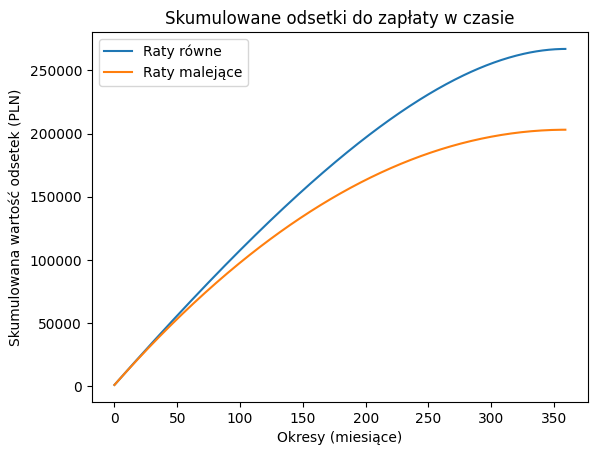

In [52]:
import matplotlib.pyplot as plt
plt.plot(interest_equal.cumsum(), label='Raty równe')
plt.plot(interest_decreasing.cumsum(), label='Raty malejące')
plt.legend()
plt.title('Skumulowane odsetki do zapłaty w czasie')
plt.xlabel('Okresy (miesiące)')
plt.ylabel('Skumulowana wartość odsetek (PLN)')
plt.show()